In [1]:
import h5py
import json
import numpy as np
import scipy
import pandas as pd
import scipy.io as sio
import glob
glob.glob(r'data\300W_LP\LFPW/*train*'+'.mat')

['data\\300W_LP\\LFPW\\LFPW_image_train_0001_0.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_1.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_10.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_11.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_12.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_13.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_14.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_15.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_16.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_2.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_3.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_4.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_5.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_6.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_7.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_8.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0001_9.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train_0002_0.mat',
 'data\\300W_LP\\LFPW\\LFPW_image_train

In [1]:
import cv2
import dlib
DETECTOR = dlib.get_frontal_face_detector()
PREDICTOR = dlib.shape_predictor("model/shape_predictor_68_face_landmarks.dat")

(120, 120, 3)


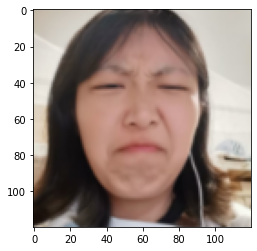

(rectangle(21,22,96,96),
 array([[ 23,  23,  24,  26,  30,  34,  40,  48,  57,  66,  74,  80,  85,
          88,  90,  92,  92,  30,  35,  42,  49,  55,  64,  70,  76,  83,
          87,  60,  60,  60,  60,  52,  56,  60,  64,  68,  36,  41,  44,
          49,  45,  41,  69,  74,  78,  81,  77,  73,  45,  51,  56,  60,
          64,  68,  72,  68,  64,  60,  56,  51,  48,  56,  60,  64,  70,
          64,  60,  56],
        [ 45,  55,  65,  74,  83,  91,  98, 102, 104, 103,  98,  91,  83,
          74,  64,  55,  45,  36,  32,  31,  32,  35,  36,  33,  32,  33,
          37,  41,  47,  53,  59,  64,  65,  66,  65,  63,  43,  42,  42,
          43,  43,  43,  43,  42,  42,  43,  44,  43,  78,  74,  72,  73,
          72,  74,  78,  80,  81,  81,  81,  80,  77,  76,  76,  75,  77,
          76,  77,  76]]))

In [47]:
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('data/face4.jpg')
face = DETECTOR(img, 1)[0]
shape = PREDICTOR(img, face)
det = dlib.get_face_chip_details(shape, size = 120, padding=0.5)
clip = dlib.extract_image_chip(img, det)
print(clip.shape)
face = DETECTOR(clip, 1)[0]
shape = PREDICTOR(clip, face)
plt.imshow(clip[...,::-1])
plt.show()
face, np.array([[p.x, p.y] for p in shape.parts()]).T

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
data1 = torch.load(r'model\2DASL_checkpoint_epoch_allParams_stage1.pth.tar')
data2 = torch.load(r'model\2DASL_checkpoint_epoch_allParams_stage2.pth.tar')

In [18]:
print(data1['res_state_dict'].keys())
print(data2['res_state_dict'].keys())
print(data1['res_state_dict']['module.fc.bias'])
print(data2['res_state_dict']['module.fc.bias'])

odict_keys(['module.conv1.weight', 'module.bn1.weight', 'module.bn1.bias', 'module.bn1.running_mean', 'module.bn1.running_var', 'module.bn1.num_batches_tracked', 'module.layer1.0.conv1.weight', 'module.layer1.0.bn1.weight', 'module.layer1.0.bn1.bias', 'module.layer1.0.bn1.running_mean', 'module.layer1.0.bn1.running_var', 'module.layer1.0.bn1.num_batches_tracked', 'module.layer1.0.conv2.weight', 'module.layer1.0.bn2.weight', 'module.layer1.0.bn2.bias', 'module.layer1.0.bn2.running_mean', 'module.layer1.0.bn2.running_var', 'module.layer1.0.bn2.num_batches_tracked', 'module.layer1.0.conv3.weight', 'module.layer1.0.bn3.weight', 'module.layer1.0.bn3.bias', 'module.layer1.0.bn3.running_mean', 'module.layer1.0.bn3.running_var', 'module.layer1.0.bn3.num_batches_tracked', 'module.layer1.0.downsample.0.weight', 'module.layer1.0.downsample.1.weight', 'module.layer1.0.downsample.1.bias', 'module.layer1.0.downsample.1.running_mean', 'module.layer1.0.downsample.1.running_var', 'module.layer1.0.downs

In [19]:
torch.save(data2['res_state_dict'], 'model/fit_model.pth')

In [10]:
import numpy as np
import scipy.io as sio
model = sio.loadmat(r'model\BFM.mat')['model']
mexp = model['expMU'][0, 0].flatten()

In [11]:
data = np.load(r'model\u_exp.npy')


In [12]:

mexp, data

(array([  -73.20293004, -7727.99325693,   867.30904523, ...,
         -110.90406812, -7804.39759525,   814.45915367]),
 array([[  -73.20293],
        [-7727.993  ],
        [  867.309  ],
        ...,
        [ -110.90407],
        [-7804.3975 ],
        [  814.45917]], dtype=float32))

In [4]:
bfmdata = sio.loadmat(r'model/BFM.mat')['model']
bfmdata

array([[(array([[-57239.016],
               [ 42965.688],
               [ 80410.125],
               ...,
               [ 58620.625],
               [-23110.14 ],
               [-15202.358]], dtype=float32), array([[-0.00241292,  0.00051114,  0.00011789, ...,  0.00229947,
                -0.00131179,  0.00085098],
               [ 0.00200848,  0.00084977,  0.00041629, ...,  0.00025827,
                -0.00048678, -0.00394936],
               [-0.00027241, -0.00084248, -0.00013446, ..., -0.00099873,
                 0.00032832,  0.0002159 ],
               ...,
               [ 0.00420375, -0.00024779, -0.00279372, ..., -0.00189428,
                 0.00058514, -0.00155547],
               [-0.00110163,  0.00842539, -0.00308243, ..., -0.00084646,
                -0.00093956, -0.00022105],
               [-0.00382176, -0.00461797, -0.00642149, ...,  0.00140105,
                -0.00196936, -0.00018916]], dtype=float32), array([[884336.25  ],
               [555884.6   ],
           

In [13]:
bfmdata['shapePC'][0, 0][:,:10].shape

(159645, 10)

In [16]:
r = []
for i in range(10):
    r.append(lambda : id(i))
print(id(i))
print(r[0]())
print(r[1]())
print(r[2]())
for i in range(0,len(r)):
    print(r[i](),end=" ")
print("\n")

r = []
for i in range(10):
    r.append(lambda n=i :id(n))
print(r[0]())
print(r[1]())
print(r[2]())
for i in range(0,len(r)):
    print(r[i](),end=" ")
print("\n")

2207727053360
2207727053360
2207727053360
2207727053360
2207727053072 2207727053104 2207727053136 2207727053168 2207727053200 2207727053232 2207727053264 2207727053296 2207727053328 2207727053360 

2207727053072
2207727053104
2207727053136
2207727053072 2207727053104 2207727053136 2207727053168 2207727053200 2207727053232 2207727053264 2207727053296 2207727053328 2207727053360 



In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
a = torch.arange(32).reshape(2,4,4)
b = torch.as_tensor([[[0,1,2],[0,1,2]],
                     [[0,1,2],[1,2,3]]])
a[0,:,:] = 0
c = torch.arange(2)[:,None].repeat(1, 3)
print(a, a.shape)
print(b[:, 0], b.shape)
print(c, c.shape)
a[c, b[:, 0], b[:, 1]] = 1
print(a)

tensor([[[ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]]]) torch.Size([2, 4, 4])
tensor([[0, 1, 2],
        [0, 1, 2]]) torch.Size([2, 2, 3])
tensor([[0, 0, 0],
        [1, 1, 1]]) torch.Size([2, 3])
tensor([[[ 1,  0,  0,  0],
         [ 0,  1,  0,  0],
         [ 0,  0,  1,  0],
         [ 0,  0,  0,  0]],

        [[16,  1, 18, 19],
         [20, 21,  1, 23],
         [24, 25, 26,  1],
         [28, 29, 30, 31]]])


In [5]:
import numpy as np
a = np.arange(6).reshape([2,-1])
b = np.array([1, 2])
print(a)
print(b)
print(b[:,None])
print(a + b[:,None])

[[0 1 2]
 [3 4 5]]
[1 2]
[[1]
 [2]]
[[1 2 3]
 [5 6 7]]


In [44]:
import torch
import torch.nn as nn
input = torch.as_tensor([[
    [[10,1,20,8],
     [12,10,0,6],
     [5,66,10,50],
     [0,0,10,9]],
    [[0,1,10,2],
     [24,30,0,80],
     [16,22,18,50],
     [10,6,0,19]],
    [[1,6,9,10],
     [12,16,0,60],
     [5,50,5,12],
     [0,10,20,99]]
]], dtype=torch.float32)
w = torch.as_tensor([[
    [[0.5,0.8,1],
     [1.6,2.5,1.8],
     [0,0.2,1]],
    [[0,1,2.5],
     [0.2,1.2,0.8],
     [0.6,1.8,1]],
    [[0,0.6,0],
     [2.6,1.5,1],
     [0,1.3,2.5]]
]])
b = torch.as_tensor([1.])
conv = nn.Conv2d(in_channels=3, out_channels=1,kernel_size=3)
conv.weight = nn.Parameter(w)
conv.bias = nn.Parameter(b)
print(conv)
output = conv(input)
print(output)

Conv2d(3, 1, kernel_size=(3, 3), stride=(1, 1))
tensor([[[[364.5000, 428.4000],
          [472.4000, 955.2000]]]], grad_fn=<ConvolutionBackward0>)


In [16]:

label = sio.loadmat(r'data\300W_LP\LFPW\LFPW_image_test_0002_0.mat')
label

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 18 08:56:45 2015',
 '__version__': '1.0',
 '__globals__': [],
 'pt2d': array([[137.77085773, 136.87775644, 136.87775644, 139.55705933,
         145.96554989, 160.72070998, 176.60174592, 192.48758895,
         216.25455526, 237.31124109, 258.47688197, 279.33993841,
         295.56320805, 303.27530805, 308.50364464, 313.31242285,
         316.19335376, 165.94432543, 178.24485622, 195.9269882 ,
         211.3057015 , 229.84262972, 260.12566652, 274.78989185,
         287.71098326, 300.85995526, 310.65266985, 241.67030998,
         240.57994356, 240.04508476, 239.21012908, 218.43855976,
         227.96971717, 235.9253309 , 243.39341019, 250.37622049,
         187.54149313, 198.19813144, 208.63654775, 216.13335944,
         206.15192586, 194.53709946, 258.52849968, 269.2070441 ,
         280.2929824 , 286.6178618 , 278.6710588 , 269.41683873,
         197.89969453, 211.90667843, 223.08108036, 231.65125601,
        

In [19]:
labelPaths = glob.glob(r'data\300W_LP\AFW' + "\\*.mat")
x = np.zeros([len(labelPaths), 136])
y = np.zeros([len(labelPaths), 228])
for i, p in enumerate(labelPaths):
    label = sio.loadmat(p)
    x[i] = label['pt2d'].flatten()
    #x[i] = x[i]/(450/2) - 1
    y[i] = np.r_[label['Shape_Para'], label['Exp_Para']].flatten()
x.shape, y.shape

((5207, 136), (5207, 228))

In [20]:
x.max(), x.min()

(389.9506998185118, 135.66075514469446)

In [5]:
from sklearn.linear_model import LinearRegression as Model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.75)
model = Model()
model.fit(xTrain, yTrain)
r2_score(yTest, model.predict(xTest))

0.7710301689678856

In [3]:
np.r_[data['Shape_Para'], data['Exp_Para']].flatten().shape

(228,)

In [11]:
data['pt2d'].shape

(2, 68)